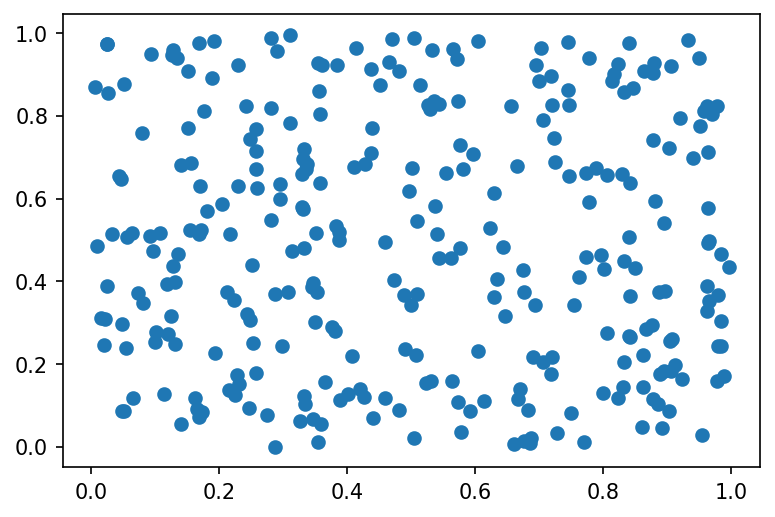

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.AcousticBrainz.LSHBias import LSHBias
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

# 2 dimensional data
data = np.random.uniform(low=0, high=1, size=(300, 2))
plt.scatter(data[:,0],data[:,1])

plt.savefig('../images/lsh_bias_demo/data.svg')

## Plot hyperplanes

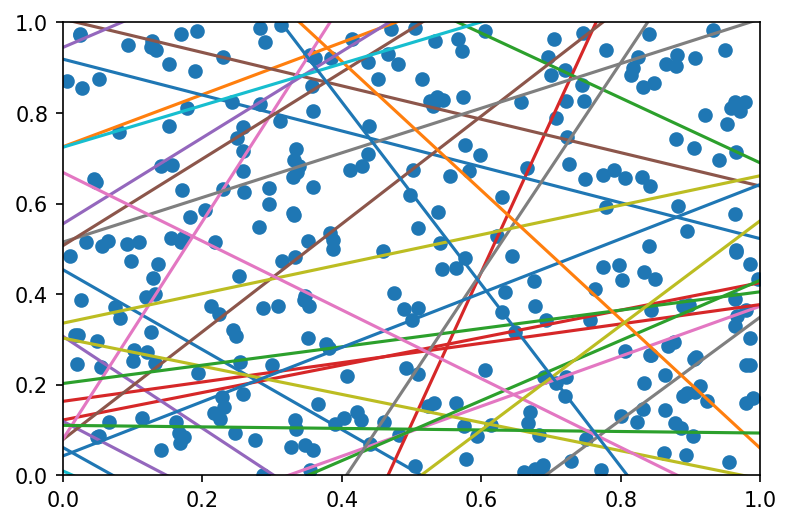

In [2]:
bits = 64
lsh = LSHBias(feature_dim=2, bits=bits)
W = lsh.W

plotrange = (0,1)
x = np.linspace(*plotrange)
for k in range(bits):
    hyperplane_y = (-W[0,k] * x - W[2,k])/W[1,k]
    plt.plot(x, hyperplane_y)

plt.scatter(data[:,0],data[:,1])
plt.xlim(plotrange)
plt.ylim(plotrange)
plt.savefig('../images/lsh_bias_demo/hyperplanes.jpg')

## Verify nearest-neighbour approximation
plot scatterplot again coloured with hash 'labels'

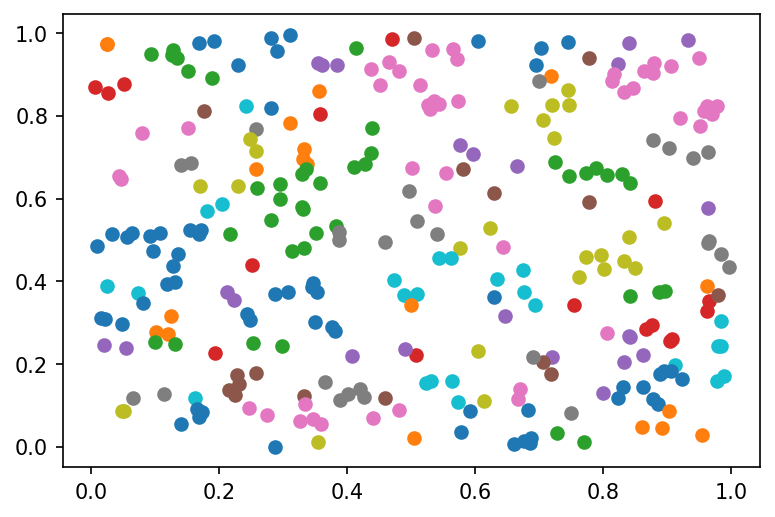

In [3]:
hashes = lsh.hash_many(data)
labels = lsh.hash_to_categories(hashes)
for group in np.unique(labels):
    i = np.where(labels == group)
    plt.scatter(data[i[0],0],data[i[0],1], label=group)

plt.savefig('../images/lsh_bias_demo/labels.svg')